# Gradient


## gradient of a function
1D toy example

2.356195197299126


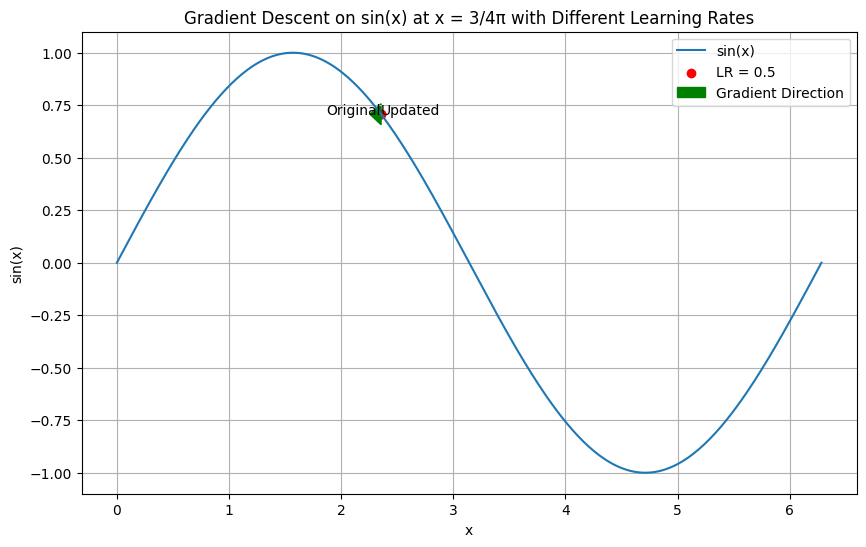

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Initial setup
x = 3/4 * math.pi  # Original point
gradient = math.cos(x)  # Gradient of sin(x) at the original point

# Learning rate setups
learning_rate = 0.000001


# Update the point's position using the second learning rate
x_new_lr = x - learning_rate * gradient

# Define the range and calculate sin(x) for plotting
x_range = np.linspace(0, 2*np.pi, 400)
y_range = np.sin(x_range)

print(x_new_lr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='sin(x)')


# Mark the updated point with learning rate
plt.scatter([x, x_new_lr], [np.sin(x), np.sin(x_new_lr)], color='red', label='LR = 0.5')
plt.text(x, np.sin(x), 'Original', horizontalalignment='right')
plt.text(x_new_lr, np.sin(x_new_lr), 'Updated', horizontalalignment='left')
plt.arrow(x, np.sin(x), learning_rate*gradient, 0, head_width=0.1, head_length=0.1, fc='green', ec='green', label='Gradient Direction')


# Additional plot settings
plt.title('Gradient Descent on sin(x) at x = 3/4π with Different Learning Rates')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


## one-step Gradient for Linear regression
2D Gradient for linear functions


Now, let's go through the manual calculations for the gradient descent step:

1. Initial parameters: $w = 0$, $b = 0$

2. Calculate the initial loss:
   $L = \frac{1}{2m} \sum(y - (wx + b))^2$
   $L = \frac{1}{6} ((2 - (0*1 + 0))^2 + (4 - (0*2 + 0))^2 + (5 - (0*3 + 0))^2)$
   $L = \frac{1}{6} (4 + 16 + 25) = 7.5$

3. Calculate the gradients:

   $\frac{\partial L}{\partial w} = \frac{1}{m} \sum(-(y - (wx + b)) * x)$
   $\frac{\partial L}{\partial w} = \frac{1}{3} (-(2 - 0) * 1 + -(4 - 0) * 2 + -(5 - 0) * 3)$
   $\frac{\partial L}{\partial w} = \frac{1}{3} (-2 - 8 - 15) = -8.33$

   $\frac{\partial L}{\partial b} = \frac{1}{m} \sum(-(y - (wx + b)))$
   $\frac{\partial L}{\partial b} = \frac{1}{3} (-(2 - 0) + -(4 - 0) + -(5 - 0))$
   $\frac{\partial L}{\partial b} = \frac{1}{3} (-2 - 4 - 5) = -3.67$

4. Update parameters:
   $w_{new} = w - \alpha * \frac{\partial L}{\partial w}$
   $w_{new} = 0 - 0.01 * (-8.33) = 0.0833$

   $b_{new} = b - \alpha * \frac{\partial L}{\partial b}$
   $b_{new} = 0 - 0.01 * (-3.67) = 0.0367$

5. Calculate the new loss:
   $L_{new} = \frac{1}{6} ((2 - (0.0833*1 + 0.0367))^2 + (4 - (0.0833*2 + 0.0367))^2 + (5 - (0.0833*3 + 0.0367))^2)$
   $L_{new} \approx 6.694$

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Create dataset
X = np.array([1, 2, 3])
y = np.array([2, 4, 5])

# Initialize parameters
w = 0
b = 0

# Set learning rate
learning_rate = 0.01

# Number of data points
m = len(X)  # m = 3

# Calculate initial loss using manual formula
initial_loss = (1 / (2 * m)) * np.sum((y - (w * X + b)) ** 2)

# Gradient descent step (manual formula)
dw = (1 / m) * np.sum(-(y - (w * X + b)) * X)
db = (1 / m) * np.sum(-(y - (w * X + b)))

# Update parameters
w_new = w - learning_rate * dw
b_new = b - learning_rate * db

# Corrected loss calculation using updated w and b
new_loss = (1 / (2 * m)) * np.sum((y - (w_new * X + b_new)) ** 2)

# Create meshgrid for 3D plot
w_range = np.linspace(-1, 3, 100)
b_range = np.linspace(-1, 3, 100)
W, B = np.meshgrid(w_range, b_range)

# Calculate loss for each point in the meshgrid
Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = (1 / (2 * m)) * np.sum((y - (W[i, j] * X + B[i, j])) ** 2)

# Create 3D surface plot
surface = go.Surface(x=W, y=B, z=Z, colorscale='viridis', opacity=0.8)

# Create scatter plots for initial and new points
initial_point = go.Scatter3d(x=[w], y=[b], z=[initial_loss], mode='markers', marker=dict(size=5, color='red'), name='Initial')
new_point = go.Scatter3d(x=[w_new], y=[b_new], z=[new_loss], mode='markers', marker=dict(size=5, color='green'), name='After 1 step')

# Create layout
layout = go.Layout(scene=dict(xaxis_title='w', yaxis_title='b', zaxis_title='Loss'),
                   title='Gradient Descent Step Visualization')

# Create figure and add traces
fig = go.Figure(data=[surface, initial_point, new_point], layout=layout)

# Show plot
fig.show()

# Print results
print(f"Initial parameters: w = {w}, b = {b}")
print(f"Parameters after one step: w = {w_new:.4f}, b = {b_new:.4f}")
print(f"Initial loss: {initial_loss:.4f}")
print(f"Loss after one step: {new_loss:.4f}")


Initial parameters: w = 0, b = 0
Parameters after one step: w = 0.0833, b = 0.0367
Initial loss: 7.5000
Loss after one step: 6.6941


### Full Gradient for linear regression


MSE/R2: 0.03284649667867498,0.8606284678924325


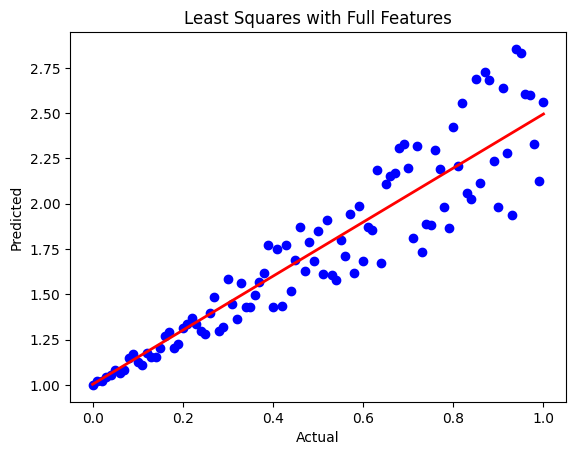

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# New data definition
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# Assuming x is your feature matrix but needs to be reshaped for matrix operations
X = x.reshape(-1, 1)  # Reshape x to be a 2D array

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(X.shape[1] + 1)  # +1 for the intercept
    n = len(X)
    for epoch in range(epochs):
        y_pred = np.dot(X, weights[1:]) + weights[0]  # Adjust to use intercept
        gradient_w = -(2/n) * X.T.dot(y - y_pred)
        gradient_b = -(2/n) * np.sum(y - y_pred)  # Gradient for intercept
        weights[1:] = weights[1:] - learning_rate * gradient_w
        weights[0] = weights[0] - learning_rate * gradient_b
    return weights

# Prepare X with intercept
X_with_ones = np.c_[np.ones(X.shape[0]), X]

# Perform gradient descent
weights = gradient_descent(X, y, learning_rate=0.1, epochs=200)

# Predict using the whole dataset for simplicity
y_pred = np.dot(X, weights[1:]) + weights[0]

# Evaluate using the same data (ideally, you should split your data into training and test sets)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MSE/R2: {mse},{r2}")

# Plot actual vs predicted values
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Least Squares with Full Features')
plt.show()


## Space Complexity


### least square

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


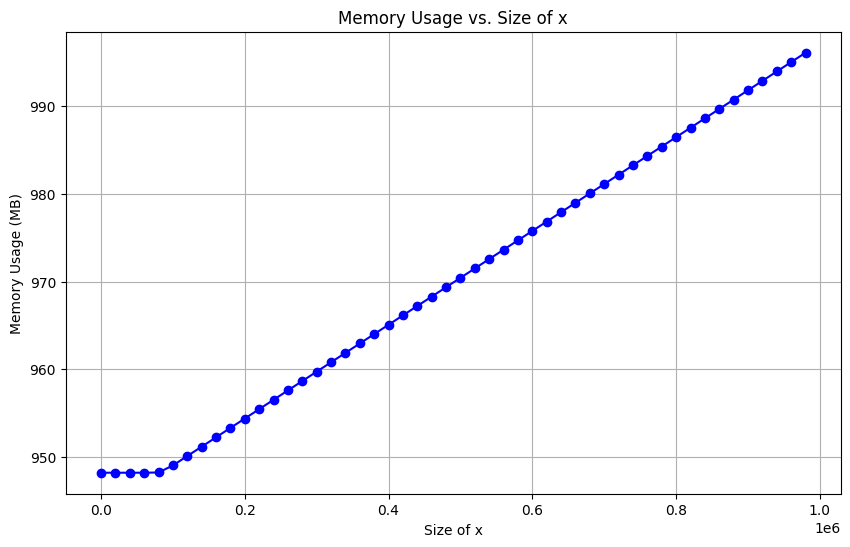

In [ ]:
!pip install memory_profiler
%load_ext memory_profiler

import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def calculate_theta_memory(size):
    x = np.linspace(0, 1, size)
    y = 1 + x + x * np.random.random(len(x))
    y = y[:, np.newaxis]
    X_prime = np.vstack([np.ones(len(x)), x]).T
    theta = np.dot((np.dot(np.linalg.inv(np.dot(X_prime.T, X_prime)), X_prime.T)), y)
    return theta

sizes = range(100, 1000001, 20000)
memory_uses = []

for size in sizes:
    # Note: memory_usage returns a list, and we are interested in the maximum usage, which is why max_usage=True is used.
    mem_use = memory_usage((calculate_theta_memory, (size,)), max_usage=True, retval=False)
    memory_uses.append(mem_use)

plt.figure(figsize=(10, 6))
plt.plot(sizes, memory_uses, marker='o', linestyle='-', color='b')
plt.xlabel('Size of x')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs. Size of x')
plt.grid(True)
plt.show()


### gradient

In [ ]:
!pip install memory_profiler
%load_ext memory_profiler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from memory_profiler import memory_usage

def run_gradient_descent(size):
    # Data generation
    x = np.linspace(0, 1, size)
    y = 1 + x + x * np.random.random(size)

    # Reshape x to be a 2D array for matrix operations
    X = x.reshape(-1, 1)

    # Gradient descent function adapted for memory profiling
    def gradient_descent(X, y, learning_rate=0.01, epochs=1):
        weights = np.zeros(X.shape[1] + 1)  # Adjust for intercept
        n = len(X)
        for epoch in range(epochs):
            y_pred = np.dot(X, weights[1:]) + weights[0]
            gradient_w = -(2/n) * X.T.dot(y - y_pred)
            gradient_b = -(2/n) * np.sum(y - y_pred)
            weights[1:] = weights[1:] - learning_rate * gradient_w
            weights[0] = weights[0] - learning_rate * gradient_b
        return weights

    # Execute gradient descent
    weights = gradient_descent(X, y, learning_rate=0.1, epochs=100)
    y_pred = np.dot(X, weights[1:]) + weights[0]

    # Simple evaluation (just to ensure computations are done)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

sizes = range(100, 1000001, 20000)
memory_uses = []

for size in sizes:
    mem_use = memory_usage((run_gradient_descent, (size,)), max_usage=True)
    memory_uses.append(mem_use)

plt.figure(figsize=(10, 6))
plt.plot(sizes, memory_uses, marker='o', linestyle='-', color='b')
plt.xlabel('Size of x')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs. Size of x for Gradient Descent')
plt.grid(True)
plt.show()


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


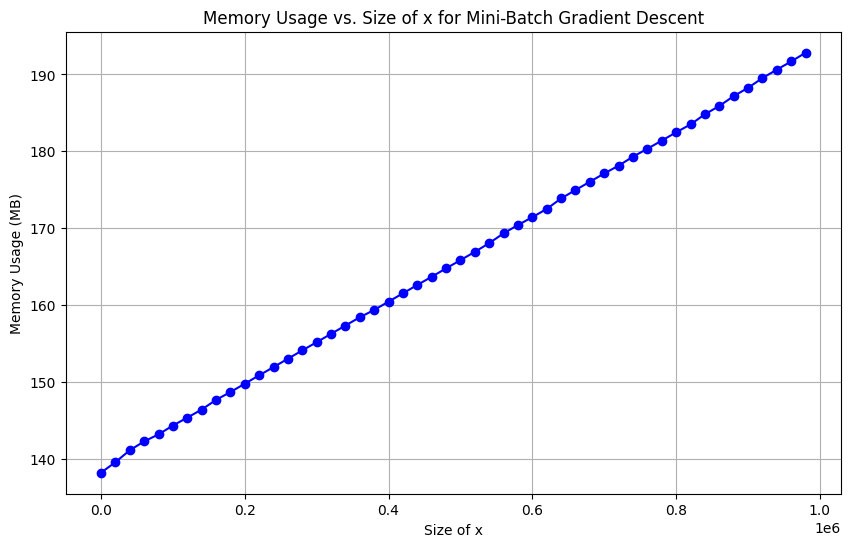

In [ ]:
!pip install memory_profiler
%load_ext memory_profiler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from memory_profiler import memory_usage

def run_gradient_descent(size, batch_size=10):
    # Data generation
    x = np.linspace(0, 1, size)
    y = 1 + x + x * np.random.random(size)

    # Reshape x to be a 2D array for matrix operations
    X = x.reshape(-1, 1)

    # Gradient descent function adapted for mini-batch training
    def gradient_descent(X, y, learning_rate=0.01, epochs=100, batch_size=50):
        weights = np.zeros(X.shape[1] + 1)  # Adjust for intercept
        n = len(X)

        # Calculate the number of batches
        num_batches = int(np.ceil(n / batch_size))

        for epoch in range(epochs):
            # Shuffle the dataset at the beginning of each epoch
            indices = np.arange(n)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(num_batches):
                start_i = i * batch_size
                end_i = start_i + batch_size
                Xi = X_shuffled[start_i:end_i]
                yi = y_shuffled[start_i:end_i]

                y_pred = np.dot(Xi, weights[1:]) + weights[0]
                gradient_w = -(2/len(Xi)) * Xi.T.dot(yi - y_pred)
                gradient_b = -(2/len(Xi)) * np.sum(yi - y_pred)
                weights[1:] = weights[1:] - learning_rate * gradient_w
                weights[0] = weights[0] - learning_rate * gradient_b

        return weights

    # Execute gradient descent with mini-batch training
    weights = gradient_descent(X, y, learning_rate=0.1, epochs=100, batch_size=batch_size)
    y_pred = np.dot(X, weights[1:]) + weights[0]

    # Simple evaluation (just to ensure computations are done)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

sizes = range(100, 1000001, 20000)
memory_uses = []

for size in sizes:
    mem_use = memory_usage((run_gradient_descent, (size,)), max_usage=True)
    memory_uses.append(mem_use)

plt.figure(figsize=(10, 6))
plt.plot(sizes, memory_uses, marker='o', linestyle='-', color='b')
plt.xlabel('Size of x')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs. Size of x for Mini-Batch Gradient Descent')
plt.grid(True)
plt.show()


## Time Complexity



### least square

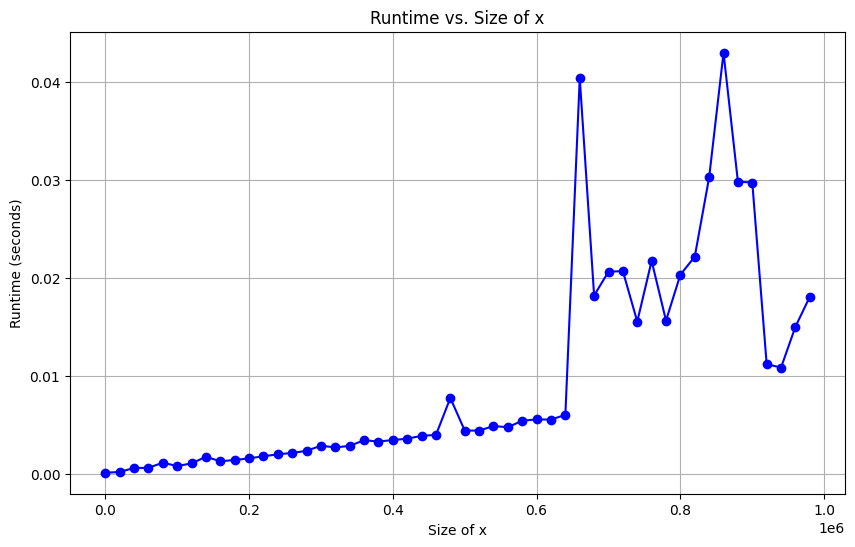

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_theta(size):
    np.random.seed(42)
    x = np.linspace(0, 1, size)
    y = 1 + x + x * np.random.random(len(x))
    y = y[:, np.newaxis]
    X_prime = np.vstack([np.ones(len(x)), x]).T
    start_time = time.time()
    theta = np.dot((np.dot(np.linalg.inv(np.dot(X_prime.T, X_prime)), X_prime.T)), y)
    end_time = time.time()
    return end_time - start_time, theta

sizes = range(100, 1000001, 20000)
runtimes = []

for size in sizes:
    runtime, _ = calculate_theta(size)
    runtimes.append(runtime)

plt.figure(figsize=(10, 6))
plt.plot(sizes, runtimes, marker='o', linestyle='-', color='b')
plt.xlabel('Size of x')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Size of x')
plt.grid(True)
plt.show()


### gradient

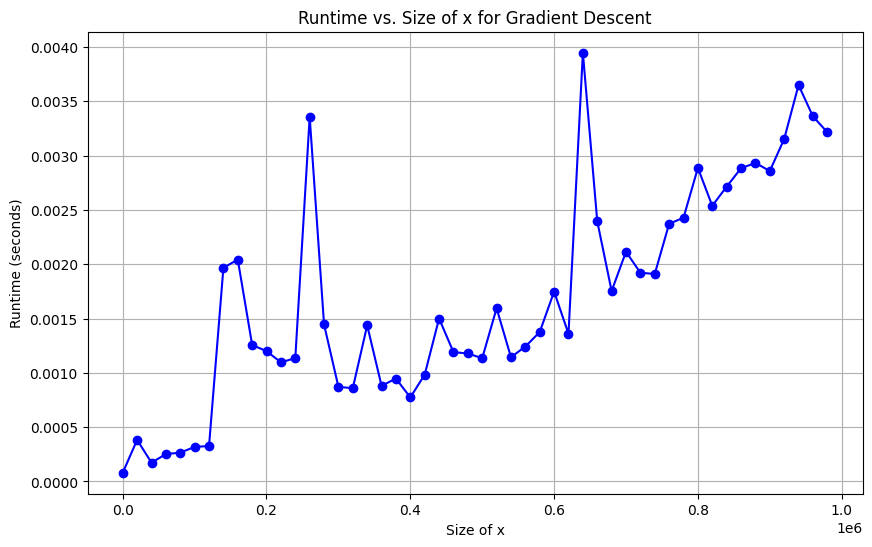

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def run_gradient_descent_and_measure_time(size):
    np.random.seed(42)  # Ensure reproducibility
    x = np.linspace(0, 1, size)
    y = 1 + x + x * np.random.random(size)

    # Reshape x to be a 2D array for matrix operations
    X = x.reshape(-1, 1)

    def gradient_descent(X, y, learning_rate=0.01, epochs=1):
        weights = np.zeros(X.shape[1] + 1)  # +1 for intercept
        n = len(X)
        for epoch in range(epochs):
            y_pred = np.dot(X, weights[1:]) + weights[0]
            gradient_w = -(2/n) * X.T.dot(y - y_pred)
            gradient_b = -(2/n) * np.sum(y - y_pred)
            weights[1:] = weights[1:] - learning_rate * gradient_w
            weights[0] = weights[0] - learning_rate * gradient_b
        return weights

    start_time = time.time()
    weights = gradient_descent(X, y, learning_rate=0.1, epochs=1)
    end_time = time.time()

    return end_time - start_time  # Return only the runtime

sizes = range(100, 1000001, 20000)
runtimes = []

for size in sizes:
    runtime = run_gradient_descent_and_measure_time(size)
    runtimes.append(runtime)

plt.figure(figsize=(10, 6))
plt.plot(sizes, runtimes, marker='o', linestyle='-', color='b')
plt.xlabel('Size of x')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Size of x for Gradient Descent')
plt.grid(True)
plt.show()


# Lp Regularizations

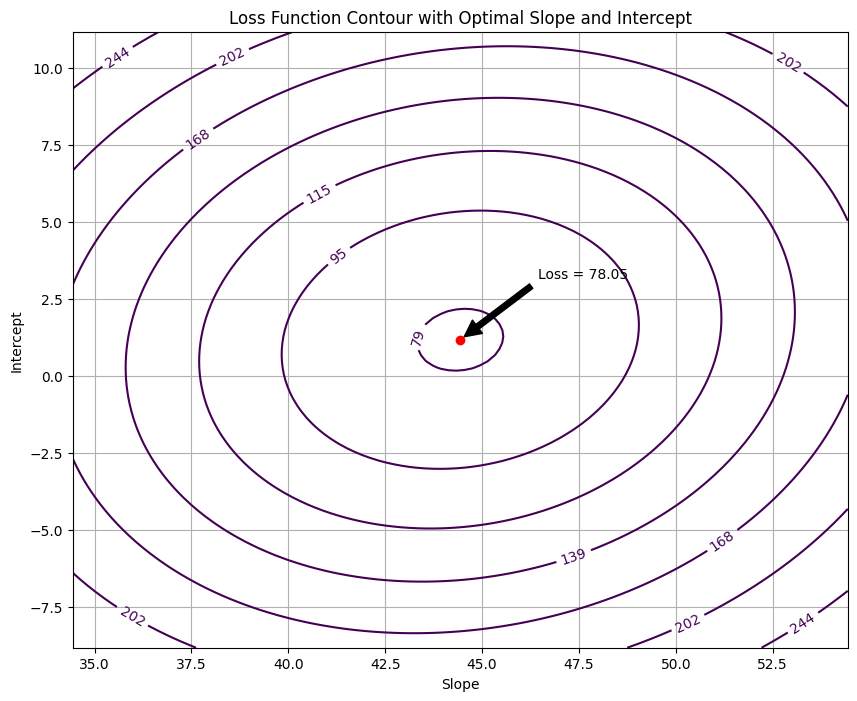

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
slope, intercept = model.coef_[0], model.intercept_

# Define a grid around the estimated slope and intercept
slope_range = np.linspace(slope - 10, slope + 10, 100)
intercept_range = np.linspace(intercept - 10, intercept + 10, 100)
slope_grid, intercept_grid = np.meshgrid(slope_range, intercept_range)

# Calculate loss over the grid
def compute_loss(slope, intercept, X, y):
    predictions = slope * X + intercept
    return np.mean((y - predictions.ravel())**2)

loss = np.zeros(slope_grid.shape)

for i in range(slope_grid.shape[0]):
    for j in range(slope_grid.shape[1]):
        loss[i, j] = compute_loss(slope_grid[i, j], intercept_grid[i, j], X, y)

# Compute the loss at the optimal point
optimal_loss = compute_loss(slope, intercept, X, y)

# Plot the contour of the loss function
plt.figure(figsize=(10, 8))
contour = plt.contour(slope_grid, intercept_grid, loss, levels=np.logspace(1, 5, 50), cmap='viridis')
plt.clabel(contour, inline=1, fontsize=10)
plt.plot(slope, intercept, 'ro')  # Mark the optimal slope and intercept

# Annotate the optimal point with the loss value
plt.annotate(f'Loss = {optimal_loss:.2f}', xy=(slope, intercept), xytext=(slope + 2, intercept + 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Loss Function Contour with Optimal Slope and Intercept')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.grid(True)
plt.show()


Linear Regression Slope: 44.4372, Intercept: 1.1651
Ridge Regression Slope: 43.8995, Intercept: 1.1093
Lasso Regression Slope: 43.2125, Intercept: 1.0379


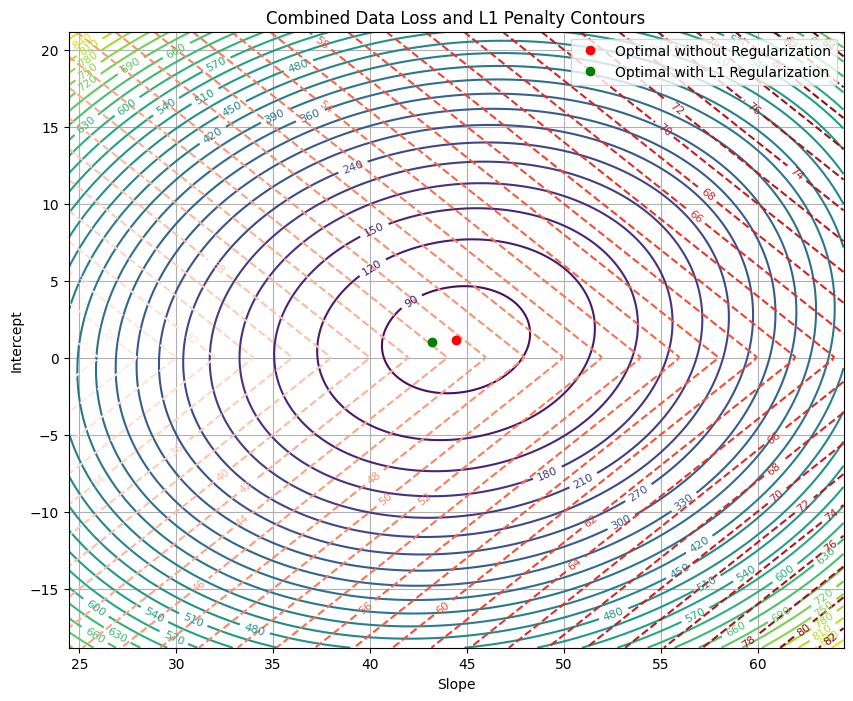

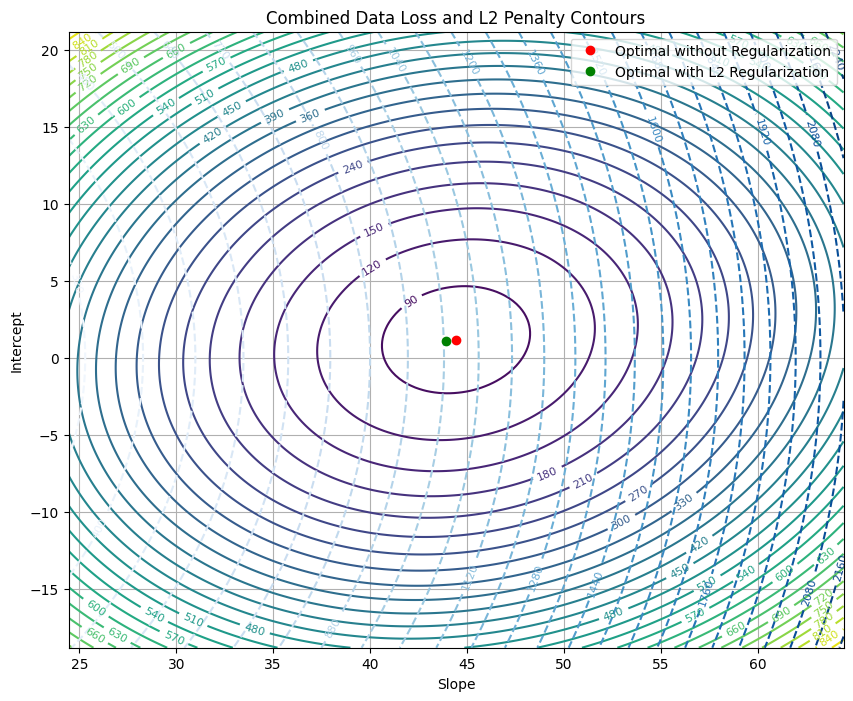

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit a linear regression model without regularization
model = LinearRegression()
model.fit(X, y)
slope, intercept = model.coef_[0], model.intercept_

# Display the slope and intercept
print(f"Linear Regression Slope: {slope:.4f}, Intercept: {intercept:.4f}")

# Define a grid around the estimated slope and intercept
slope_range = np.linspace(slope - 20, slope + 20, 200)
intercept_range = np.linspace(intercept - 20, intercept + 20, 200)
slope_grid, intercept_grid = np.meshgrid(slope_range, intercept_range)

# Define the compute_loss function without regularization
def compute_data_loss(slope, intercept, X, y):
    predictions = slope * X + intercept
    mse = np.mean((y - predictions.ravel())**2)
    return mse

# Compute data loss over the grid
data_loss = np.zeros(slope_grid.shape)
for i in range(slope_grid.shape[0]):
    for j in range(slope_grid.shape[1]):
        data_loss[i, j] = compute_data_loss(slope_grid[i, j], intercept_grid[i, j], X, y)

# Set the regularization strength
lambda_reg = 1.0

# Compute L2 regularization penalty over the grid
L2_penalty = (lambda_reg / 2) * (slope_grid**2 + intercept_grid**2)

# Compute L1 regularization penalty over the grid
L1_penalty = lambda_reg * (np.abs(slope_grid) + np.abs(intercept_grid))

# Fit Ridge regression model (L2 Regularization)
ridge_model = Ridge(alpha=lambda_reg)
ridge_model.fit(X, y)
slope_ridge, intercept_ridge = ridge_model.coef_[0], ridge_model.intercept_
print(f"Ridge Regression Slope: {slope_ridge:.4f}, Intercept: {intercept_ridge:.4f}")

# Fit Lasso regression model (L1 Regularization)
lasso_model = Lasso(alpha=lambda_reg, max_iter=10000)
lasso_model.fit(X, y)
slope_lasso, intercept_lasso = lasso_model.coef_[0], lasso_model.intercept_
print(f"Lasso Regression Slope: {slope_lasso:.4f}, Intercept: {intercept_lasso:.4f}")

# Plot combined contours for L1 regularization
plt.figure(figsize=(10, 8))
# Plot data loss contours
contour_data = plt.contour(slope_grid, intercept_grid, data_loss, levels=30, cmap='viridis')
plt.clabel(contour_data, inline=1, fontsize=8)
# Plot L1 penalty contours
contour_L1 = plt.contour(slope_grid, intercept_grid, L1_penalty, levels=30, cmap='Reds', linestyles='dashed')
plt.clabel(contour_L1, inline=1, fontsize=8)
# Mark the optimal parameters
plt.plot(slope, intercept, 'ro', label='Optimal without Regularization')
plt.plot(slope_lasso, intercept_lasso, 'go', label='Optimal with L1 Regularization')
plt.title('Combined Data Loss and L1 Penalty Contours')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)
plt.show()

# Plot combined contours for L2 regularization
plt.figure(figsize=(10, 8))
# Plot data loss contours
contour_data = plt.contour(slope_grid, intercept_grid, data_loss, levels=30, cmap='viridis')
plt.clabel(contour_data, inline=1, fontsize=8)
# Plot L2 penalty contours
contour_L2 = plt.contour(slope_grid, intercept_grid, L2_penalty, levels=30, cmap='Blues', linestyles='dashed')
plt.clabel(contour_L2, inline=1, fontsize=8)
# Mark the optimal parameters
plt.plot(slope, intercept, 'ro', label='Optimal without Regularization')
plt.plot(slope_ridge, intercept_ridge, 'go', label='Optimal with L2 Regularization')
plt.title('Combined Data Loss and L2 Penalty Contours')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)
plt.show()


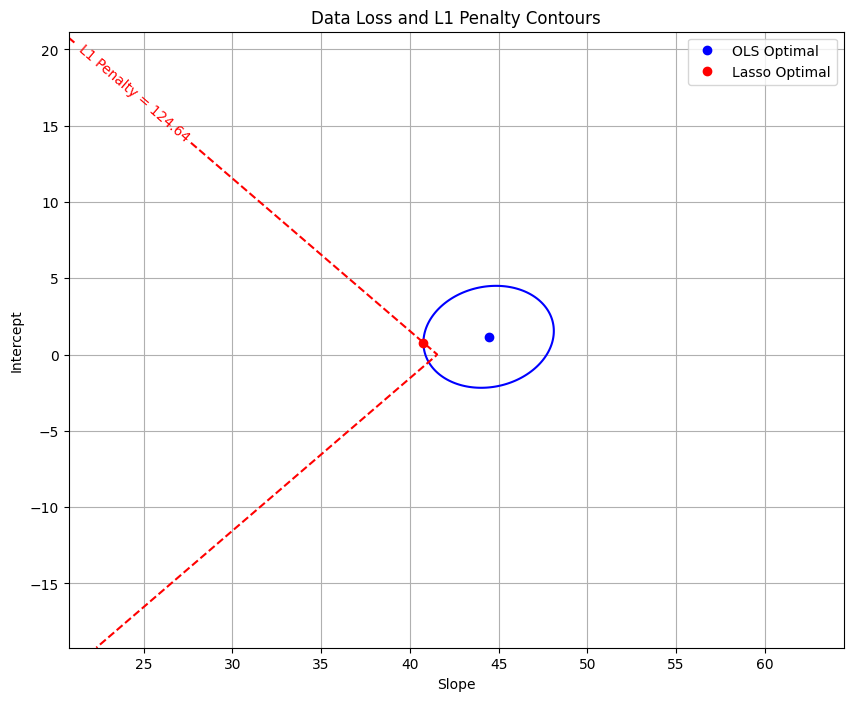

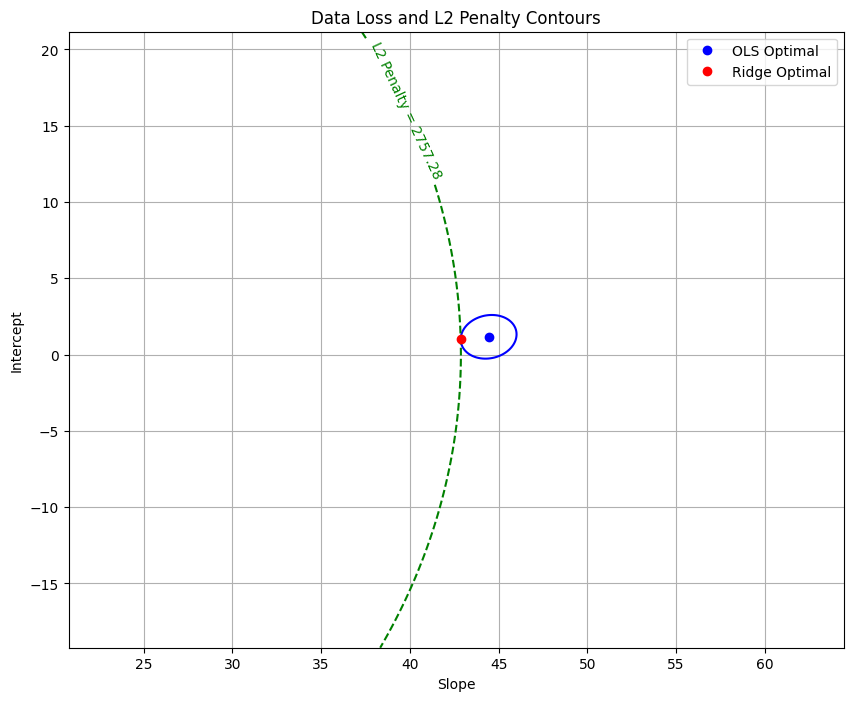

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Define the compute_data_loss function
def compute_data_loss(slope, intercept, X, y):
    predictions = slope * X + intercept
    mse = np.mean((y - predictions.ravel())**2)
    return mse

# Compute OLS (without regularization)
model = LinearRegression()
model.fit(X, y)
slope_ols, intercept_ols = model.coef_[0], model.intercept_
data_loss_ols = compute_data_loss(slope_ols, intercept_ols, X, y)

# Set the regularization strength
lambda_reg = 3.0

# Define penalty functions
def compute_L1_penalty(slope, intercept, lambda_reg):
    return lambda_reg * (np.abs(slope) + np.abs(intercept))

def compute_L2_penalty(slope, intercept, lambda_reg):
    return (lambda_reg / 2) * (slope**2 + intercept**2)

# Fit Lasso regression model (L1 Regularization)
lasso_model = Lasso(alpha=lambda_reg, max_iter=10000)
lasso_model.fit(X, y)
slope_lasso, intercept_lasso = lasso_model.coef_[0], lasso_model.intercept_
data_loss_lasso = compute_data_loss(slope_lasso, intercept_lasso, X, y)
L1_penalty_lasso = compute_L1_penalty(slope_lasso, intercept_lasso, lambda_reg)

# Fit Ridge regression model (L2 Regularization)
ridge_model = Ridge(alpha=lambda_reg)
ridge_model.fit(X, y)
slope_ridge, intercept_ridge = ridge_model.coef_[0], ridge_model.intercept_
data_loss_ridge = compute_data_loss(slope_ridge, intercept_ridge, X, y)
L2_penalty_ridge = compute_L2_penalty(slope_ridge, intercept_ridge, lambda_reg)

# Define a grid around the estimated slope and intercept for plotting
slope_min = min(slope_ols, slope_lasso, slope_ridge) - 20
slope_max = max(slope_ols, slope_lasso, slope_ridge) + 20
intercept_min = min(intercept_ols, intercept_lasso, intercept_ridge) - 20
intercept_max = max(intercept_ols, intercept_lasso, intercept_ridge) + 20
slope_range = np.linspace(slope_min, slope_max, 400)
intercept_range = np.linspace(intercept_min, intercept_max, 400)
slope_grid, intercept_grid = np.meshgrid(slope_range, intercept_range)

# Compute data loss over the grid
data_loss_grid = np.zeros(slope_grid.shape)
for i in range(slope_grid.shape[0]):
    for j in range(slope_grid.shape[1]):
        data_loss_grid[i, j] = compute_data_loss(slope_grid[i, j], intercept_grid[i, j], X, y)

# Compute L1 and L2 penalties over the grid
L1_penalty_grid = compute_L1_penalty(slope_grid, intercept_grid, lambda_reg)
L2_penalty_grid = compute_L2_penalty(slope_grid, intercept_grid, lambda_reg)

# Plot for L1 Regularization
plt.figure(figsize=(10, 8))
# Plot data loss contour at OLS data loss
contour_data_ols = plt.contour(slope_grid, intercept_grid, data_loss_grid, levels=[data_loss_ols], colors='blue', linestyles='dotted')
plt.clabel(contour_data_ols, inline=1, fontsize=10, fmt='OLS Loss = %.2f' % data_loss_ols)
# Plot data loss contour at Lasso data loss
contour_data_lasso = plt.contour(slope_grid, intercept_grid, data_loss_grid, levels=[data_loss_lasso], colors='blue')
plt.clabel(contour_data_lasso, inline=1, fontsize=10, fmt='Lasso Loss = %.2f' % data_loss_lasso)
# Plot L1 penalty contour at Lasso optimal penalty
contour_L1 = plt.contour(slope_grid, intercept_grid, L1_penalty_grid, levels=[L1_penalty_lasso], colors='red', linestyles='dashed')
plt.clabel(contour_L1, inline=1, fontsize=10, fmt='L1 Penalty = %.2f' % L1_penalty_lasso)
# Mark the optimal parameters
plt.plot(slope_ols, intercept_ols, 'bo', label='OLS Optimal')
plt.plot(slope_lasso, intercept_lasso, 'ro', label='Lasso Optimal')
plt.title('Data Loss and L1 Penalty Contours')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)
plt.show()

# Plot for L2 Regularization
plt.figure(figsize=(10, 8))
# Plot data loss contour at OLS data loss
contour_data_ols = plt.contour(slope_grid, intercept_grid, data_loss_grid, levels=[data_loss_ols], colors='blue', linestyles='dotted')
plt.clabel(contour_data_ols, inline=1, fontsize=10, fmt='OLS Loss = %.2f' % data_loss_ols)
# Plot data loss contour at Ridge data loss
contour_data_ridge = plt.contour(slope_grid, intercept_grid, data_loss_grid, levels=[data_loss_ridge], colors='blue')
plt.clabel(contour_data_ridge, inline=1, fontsize=10, fmt='Ridge Loss = %.2f' % data_loss_ridge)
# Plot L2 penalty contour at Ridge optimal penalty
contour_L2 = plt.contour(slope_grid, intercept_grid, L2_penalty_grid, levels=[L2_penalty_ridge], colors='green', linestyles='dashed')
plt.clabel(contour_L2, inline=1, fontsize=10, fmt='L2 Penalty = %.2f' % L2_penalty_ridge)
# Mark the optimal parameters
plt.plot(slope_ols, intercept_ols, 'bo', label='OLS Optimal')
plt.plot(slope_ridge, intercept_ridge, 'ro', label='Ridge Optimal')
plt.title('Data Loss and L2 Penalty Contours')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)
plt.show()


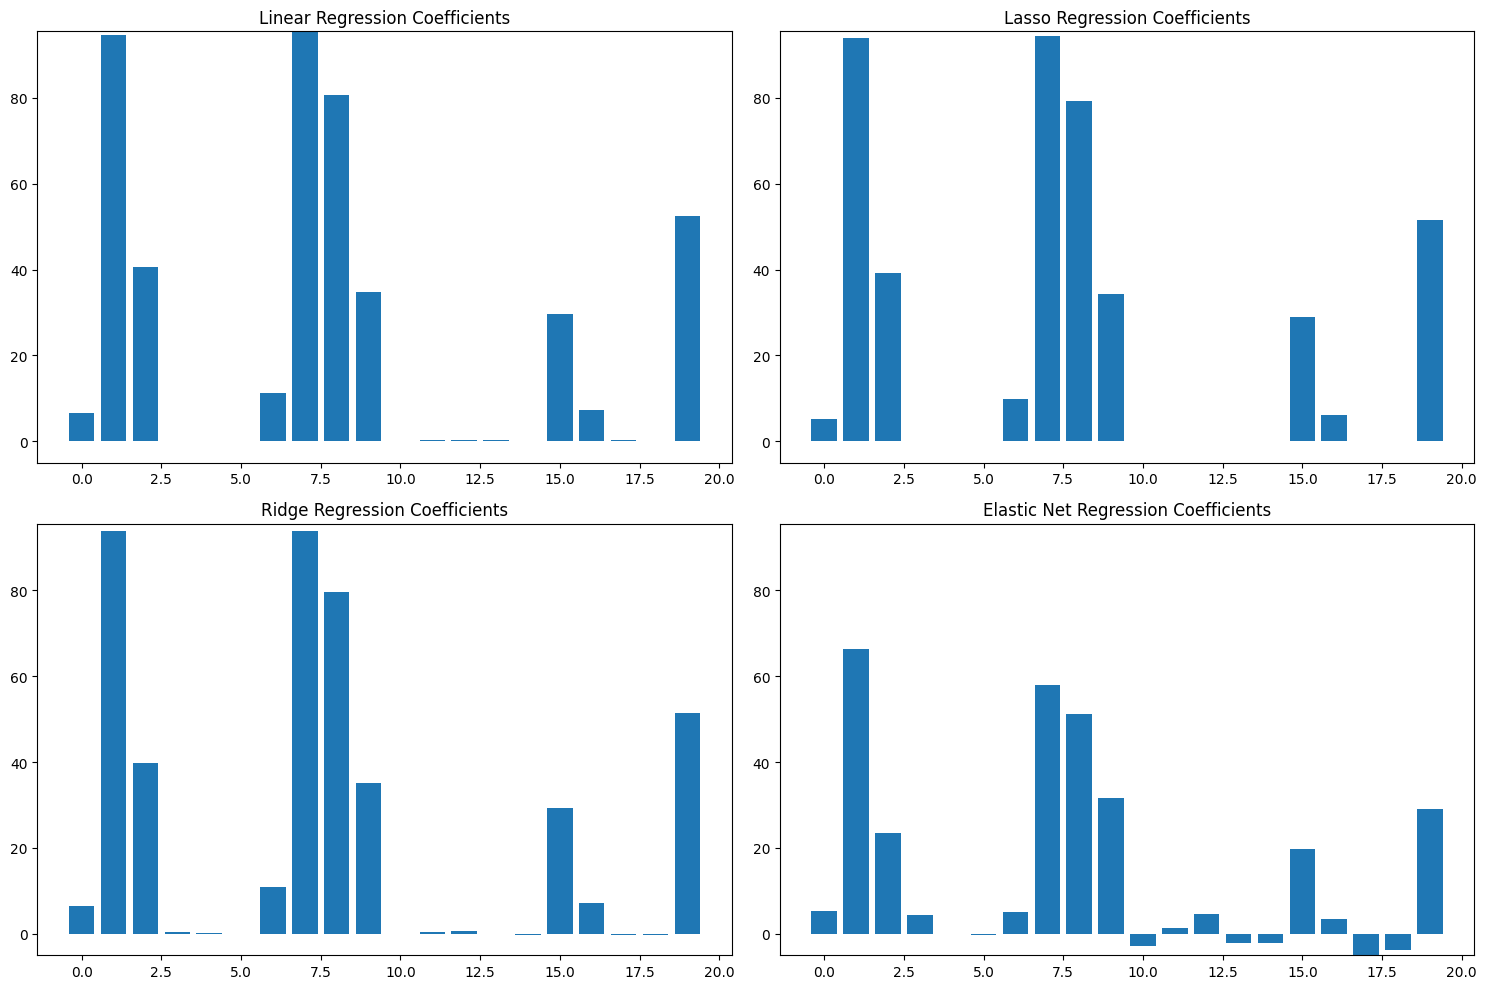

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
linear_model = LinearRegression().fit(X_train, y_train)
lasso_model = Lasso(alpha=1.0).fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(X_train, y_train)

# Extract coefficients
linear_coef = linear_model.coef_
lasso_coef = lasso_model.coef_
ridge_coef = ridge_model.coef_
elastic_net_coef = elastic_net_model.coef_

# Unify the y-axis range for better comparison
min_coef = min(min(linear_coef), min(lasso_coef), min(ridge_coef), min(elastic_net_coef))
max_coef = max(max(linear_coef), max(lasso_coef), max(ridge_coef), max(elastic_net_coef))

# Plot the coefficients with unified y-axis
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(range(len(linear_coef)), linear_coef)
plt.ylim([min_coef, max_coef])
plt.title("Linear Regression Coefficients")

plt.subplot(2, 2, 2)
plt.bar(range(len(lasso_coef)), lasso_coef)
plt.ylim([min_coef, max_coef])
plt.title("Lasso Regression Coefficients")

plt.subplot(2, 2, 3)
plt.bar(range(len(ridge_coef)), ridge_coef)
plt.ylim([min_coef, max_coef])
plt.title("Ridge Regression Coefficients")

plt.subplot(2, 2, 4)
plt.bar(range(len(elastic_net_coef)), elastic_net_coef)
plt.ylim([min_coef, max_coef])
plt.title("Elastic Net Regression Coefficients")

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
linear_model = LinearRegression().fit(X_train, y_train)
lasso_model = Lasso(alpha=1.0).fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(X_train, y_train)

# Extract coefficients
linear_coef = linear_model.coef_
lasso_coef = lasso_model.coef_
ridge_coef = ridge_model.coef_
elastic_net_coef = elastic_net_model.coef_

# Create a subplot
fig = make_subplots(rows=2, cols=2, subplot_titles=("Linear Regression", "Lasso (L1)", "Ridge (L2)", "Elastic Net (L1+L2)"))

# Unify the y-axis range for better comparison
min_coef = min(min(linear_coef), min(lasso_coef), min(ridge_coef), min(elastic_net_coef))
max_coef = max(max(linear_coef), max(lasso_coef), max(ridge_coef), max(elastic_net_coef))

# Add data to subplots
fig.add_trace(go.Bar(x=list(range(len(linear_coef))), y=linear_coef, name="Linear Regression"), row=1, col=1)
fig.add_trace(go.Bar(x=list(range(len(lasso_coef))), y=lasso_coef, name="Lasso (L1)"), row=1, col=2)
fig.add_trace(go.Bar(x=list(range(len(ridge_coef))), y=ridge_coef, name="Ridge (L2)"), row=2, col=1)
fig.add_trace(go.Bar(x=list(range(len(elastic_net_coef))), y=elastic_net_coef, name="Elastic Net (L1+L2)"), row=2, col=2)

# Update y-axis to have the same scale
fig.update_yaxes(range=[min_coef, max_coef], row=1, col=1)
fig.update_yaxes(range=[min_coef, max_coef], row=1, col=2)
fig.update_yaxes(range=[min_coef, max_coef], row=2, col=1)
fig.update_yaxes(range=[min_coef, max_coef], row=2, col=2)

# Update layout
fig.update_layout(height=600, width=800, title_text="Coefficient Distributions of Different Regression Models")

fig.show()


In [ ]:
linear_coef

array([ 6.59177136e+00,  9.47613397e+01,  4.07047695e+01,  7.90905879e-03,
        9.90618301e-03, -5.46987900e-03,  1.11145168e+01,  9.55145210e+01,
        8.08201394e+01,  3.48792622e+01,  1.24152143e-02,  1.36950800e-02,
        2.27832545e-02,  1.42568345e-02, -8.80438611e-03,  2.99314694e+01,
        7.23950946e+00,  1.29256083e-02, -1.48098055e-03,  5.22817603e+01])

In [ ]:
lasso_coef

array([ 5.18235718, 94.08790033, 39.28599226,  0.        , -0.        ,
       -0.        ,  9.70831092, 94.47599586, 79.3771414 , 34.2410959 ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       29.06032215,  6.0445862 , -0.        ,  0.        , 51.37718529])

In [ ]:
ridge_coef

array([ 6.58063471e+00,  9.38290851e+01,  3.99205076e+01,  3.76923158e-01,
        8.08482656e-02, -1.13640379e-01,  1.08110842e+01,  9.38202746e+01,
        7.95963851e+01,  3.50282569e+01, -2.75469686e-01,  1.55594565e-01,
        4.57613279e-01, -1.84879705e-01, -2.12648007e-01,  2.95510135e+01,
        7.06875582e+00, -3.46071419e-01, -3.24332981e-01,  5.11896704e+01])

In [ ]:
elastic_net_coef

array([ 5.41918488, 66.41213731, 23.39729624,  4.347319  , -0.        ,
       -0.36920165,  4.8287737 , 58.03887471, 51.15594111, 31.74079304,
       -2.9003769 ,  1.34150047,  4.52556366, -2.29312331, -2.13511125,
       19.8716682 ,  3.25697527, -5.15247646, -3.78437105, 28.91869047])